<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
#!pip install apimoex

In [2]:
import requests
import numpy as np
import apimoex
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [3]:
stock_quotes = ['GAZP', 'YNDX', 'RUAL', 'IRAO', 'GMKN', 'LKOH', 'MGNT', 'MTSS', 'NVTK', 'PLZL', 'ROSN', 'SBER',
               'SNGS', 'TATN','CHMF']

In [4]:
# with requests.Session() as session:
#     for elem in stock_quotes:
#         data = apimoex.get_board_history(session, elem)
#         df_2 = pd.DataFrame(data)
#         df_2.rename(columns = {'CLOSE':elem}, inplace = True)
#         print(elem, df_2['TRADEDATE'][0])

In [5]:
df = pd.DataFrame({"Date": pd.date_range(start='2015-03-30', freq='1d', end=date.today() - timedelta(days=1))})

In [6]:
df

,Date
0,2015-03-30
1,2015-03-31
2,2015-04-01
3,2015-04-02
4,2015-04-03
...,...
3155,2023-11-18
3156,2023-11-19
3157,2023-11-20
3158,2023-11-21


In [7]:
with requests.Session() as session:
    for elem in stock_quotes:
        data = apimoex.get_board_history(session, elem)
        data = pd.DataFrame(data)
        data.rename(columns = {'CLOSE':elem}, inplace = True)
        data['TRADEDATE'] = pd.to_datetime(data['TRADEDATE'])
        data = data[data['TRADEDATE'] >= '2015-03-30' ]
        df = df.merge(data[[elem, 'TRADEDATE']], left_on='Date', right_on='TRADEDATE', how='outer')
        df = df.drop('TRADEDATE', axis=1)

In [8]:
df = df.dropna()

In [9]:
df

,Date,GAZP,YNDX,RUAL,IRAO,GMKN,LKOH,MGNT,MTSS,NVTK,PLZL,ROSN,SBER,SNGS,TATN,CHMF
0,2015-03-30,137.00,887.0,37.340,1.0450,10530.0,2657.0,11185.0,246.30,432.0,1028.0,247.50,63.01,35.690,278.9,657.00
1,2015-03-31,138.90,893.0,36.790,1.0999,10399.0,2705.0,11350.0,247.00,432.0,1016.5,252.15,62.88,35.100,287.0,658.00
2,2015-04-01,143.00,902.0,35.825,1.1200,10539.0,2755.0,11750.0,250.90,450.3,1028.0,261.35,64.50,35.990,300.1,644.50
3,2015-04-02,143.90,919.0,36.450,1.1034,10090.0,2780.5,11971.0,250.00,467.2,1011.0,262.55,65.92,37.000,301.5,643.00
4,2015-04-03,143.94,940.0,36.720,1.1050,10237.0,2824.8,11799.0,248.60,476.4,1013.0,263.70,65.50,36.690,299.0,641.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2023-11-16,165.48,2569.0,39.035,4.2140,17008.0,7135.5,5823.0,271.05,1538.2,11207.0,572.75,279.70,31.175,602.1,1350.80
3154,2023-11-17,165.31,2572.0,39.040,4.2230,17168.0,7225.5,5903.5,269.05,1536.0,11220.0,583.30,281.60,32.305,615.5,1351.00
3157,2023-11-20,165.51,2573.4,39.000,4.2570,17098.0,7194.5,5931.0,269.95,1545.6,11209.0,581.50,282.91,32.040,615.4,1332.40
3158,2023-11-21,165.15,2572.6,38.915,4.2980,17250.0,7209.0,5952.0,272.85,1539.0,11338.5,583.40,282.79,32.345,634.2,1327.00


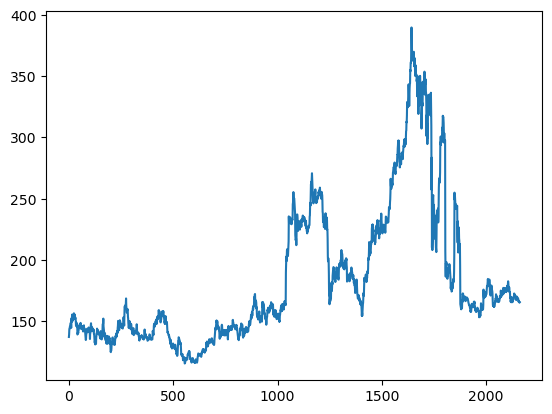

In [10]:
plt.plot(list(df['GAZP']))

In [11]:
df.to_csv("fin_quotes_per_day.csv", index=False)